<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Distributions: Part I
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 2: Topic 12</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### Probability distribution

Representation of the frequencies of potential outcomes of experiment.

#### Example case:
    
What is probability is that a given student at Flatiron has:
- Age < 25.
- 25 <= Age < 30.
- 30 <= Age < 35.
- 35 <= Age < 40.
- Age >= 40

#### Sample vs population

<center><img src="Images/population_sample.png" width="500"/></center>

    


**Population**: whole group we're interested in. Population being the whole set of possible outcomes.

**Sample**: random subset picked over the population. 

#### One way to build probability distribution:

- Get ages of all students at Flatiron (population)
- Bin accordingly to build probability distribution.

We find:



Discrete example
(binned distribution of student ages ):

- $15\%$ are under the age of $25$
- $30\%$ are between $25$ & $30$
- $25\%$ are between $30$ & $35$
- $20\%$ are between $35$ & $40$
- $10\%$ are over the age of $40$

**Build probability distribution from population percentages**

#### Sampling

- Picking a person randomly: 

What is the probability that person is older than 40?

$$ P = 0.1 $$

#### Probability Mass Function (PMF)

Probability distribution over finite outcomes. Nothing fancy.

In [1]:
import pandas as pd
import numpy as np
outcome_df = pd.DataFrame([('<25', 0.15),('25-30', 0.3,),('30-35', 0.2,),('35-40', .25,),('>40', .1,)], columns=['Age Range', 'PMF'])

Probability mass function in table form

In [2]:
outcome_df

,Age Range,PMF
0,<25,0.15
1,25-30,0.30
2,30-35,0.20
3,35-40,0.25
4,>40,0.10


#### Plot PMF

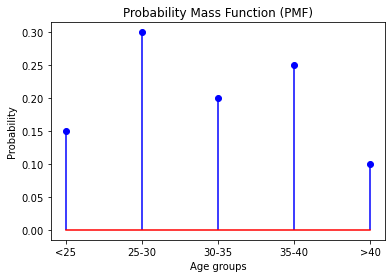

In [38]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import stem


plt.stem(outcome_df['Age Range'], outcome_df['PMF'], linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Age groups')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF)')
plt.show()

An actual use of using population data to build probability distributions:
- US Census data
- Reef base: Global coral reef database
- Large training sets: Ad-tech click rate data

#### Mathematical models of distribution

#### Common types of distributions: Discrete 

- In many cases: know what a population distribution _should_ be.
- Can model uncertainty: mathematically define a model governing statistics or population level data.



Mathematical distribution of random variables $X$:
- governed by specific functional form
- parameters of distribution

- **Bernoulli Distribution**
    - Represents the probability of success for a certain experiment (binary outcome).
    - Did someone click on an ad banner or not?

$$ B(X| p) = p^X(1-p)^{1-X} $$

Yes: X = 1 <br>
No: X = 0 <br>
$p$: probability of banner clicked. A parameter.

Probability of clicked:
$$ B(X = 1| p) = p $$ <br>

Probability of not clicked:
$$ B(X = 0| p) = 1 - p $$

Scipy stats can help us with sampling distribution/plotting PMF, etc

Probability is 4% of ad being clicked.

In [39]:
# import bernoulli
from scipy.stats import bernoulli

bernoulli_pmf = [(x, bernoulli.pmf(x, p = .04)) for x in [0,1]]
bernoulli_pmf

[(0, 0.96), (1, 0.04000000000000001)]

The pmf can be visualized with a stem plot:

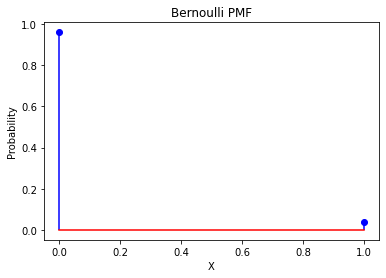

In [57]:
# create list of x values and a list of y values for matplotlib
unzipped_bernoulli = list(zip(*bernoulli_pmf))

plt.stem(unzipped_bernoulli[0], unzipped_bernoulli[1], linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Bernoulli PMF')
plt.show()

#### Expectation values: mean and variance of a distribution

The mean is the a sum of:
- possible values of the random variable $X$
- weighted by the probability distribution of $X$ at these values.

$$ E[X] = \sum_i X_i P(X_i|\theta) $$

where $\theta$ is possible parameters of the distribution.

First calculate for a uniform distribution:

If we have three possible values for a each equally likely:
    
$$E[X] = X_1\cdot\frac{1}{3} + X_2\cdot\frac{1}{3} + X_3\cdot\frac{1}{3} $$


$$ E[X] = \frac{X_1 + X_2 + X_3}{3} $$

Let' do this for the Bernoulli distribution:

$$ E[X] = 1\cdot B(X =1 | p) + 0 \cdot B(X = 0 | p) = p $$

as  $ B(X =1 | p) = p $

The variance on the other hand is:

$$ E[(X - E[X])^2] =  \sum_i (X_i - E[X])^2 P(X_i|\theta)$$

which for the Bernulli distribution is:

$$  (1 - p)^2 B(X = 1| p) + (0 - p)^2 B(X = 0| p) $$

implies that:
    
$$ Var[X] = (1 - p)^2p + (0 - p)^2(1 - p) $$

and fully simplified:
$$ Var[X] = p(1 - p) $$

Mean and variance of $X$  for our ad clicking example?

In [49]:
# calculate it for me 

p = 0.4

mean = 0.4
var = mean*(1-0.4)

Scipy also has a useful method for getting mean, variance of the distribution:
- .stats(parameters, ...)

In [50]:
# gives mean and variance in a tuple
bernoulli.stats(p = 0.04)

(array(0.04), array(0.0384))

#### Sampling
- More often than not we use the Bernoulli distribution in simulations:
    - create a finite size sample modeled from distribution.
    

Let's random sample this distribution 100 times.

In [51]:
bernoulli.rvs(p = 0.04, size = 100)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

A very useful program:

In [52]:
for x in bernoulli.rvs(p = 0.5, size = 10):
    if x == 1:
        print('She loves me.')
    else:
        print('She loves me not.')

She loves me not.
She loves me.
She loves me not.
She loves me.
She loves me not.
She loves me.
She loves me.
She loves me.
She loves me not.
She loves me not.


- **Binomial Distribution**
    - Generalizes Bernoulli to fixed number of trials.
    - Probability of observing some number of successes $k$ for $N$ Bernoulli trials.
    

- success probability of single Bernoulli trial: $p$
- N trials
- Probability of k sucesses?

$$ Binomial(k | N, p) = \frac{N!}{(N-k)!k!}p^k(1-p)^{N-k} $$

Parsing

$$ Binomial(k | N, p) = \frac{N!}{(N-k)!k!}p^k(1-p)^{N-k} $$

Since each trial is statistically independent:

$$ p^k(1-p)^{N-k} $$

Product of individual Bernoulli failure/success probabilities.

Prefactor because need to count numbers of ways to get $k$ successful trials:

$$ \frac{N!}{(N-k)!k!} $$

- Order within successful/unsuccessful trials does not matter.

e.g. SFFSF is same as SFFSF



#### Example

-  Estimate number of successful free throw shots in 10 tries.
- For Shaquille O'Neale: Career free throw pct = 52.7%

<img src = "images/shaw.webp" >
<center> Shaq throwin free throw bricks. </center>

scipy has functionality for binomial:
- .binom class

Define binomial:
- distribution parameters:
    - N = 8 trials
    - Bernoulli success/failure p = .527

In [58]:
from scipy.stats import binom
N = 8
p = 0.527

pmf_binomial = [(x, binom.pmf(x, n = N, p = p)) 
                for x in range(9)]

Generates probability of $k$ sucesses in 8 trials:  $k$ ranging from 0 to 8.

In [54]:
print(pmf_binomial)

[(0, 0.0025054695324104397), (1, 0.02233204978571335), (2, 0.08708555143709996), (3, 0.1940553302636435), (4, 0.27026204822658595), (5, 0.24089319140027196), (6, 0.13419736983926356), (7, 0.04271942851422039), (8, 0.005949561000791266)]


Plot the pmf:

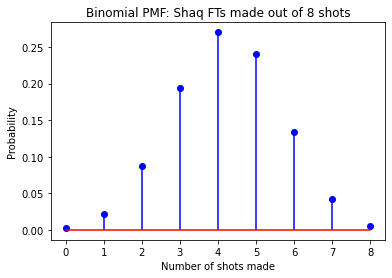

In [56]:
x,y = list(zip(*pmf_binomial))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title('Binomial PMF: Shaq FTs made out of 8 shots')
plt.ylabel('Probability')
plt.xlabel('Number of shots made')
plt.title
plt.show()

Can sample this binomial distribution:
- Get a list of number of successes for each trial
- 200 trials

Can sample this binomial distribution:

In [13]:

N = 8  # number of samples for user-site interaction trial
p = 0.527  # probability of success
size = 200  # number of trials

# Create a discrete distribution with the given parameter values
binomial = binom.rvs(n = N, p=p, size=size)

print(f'Number of ad clicks in each trial of 50 samples: \n {binomial} \n')

Number of ad clicks in each trial of 50 samples: 
 [4 4 6 4 4 5 4 3 3 1 4 1 4 5 3 6 4 5 4 2 5 7 3 5 3 6 4 4 4 3 4 6 3 4 3 5 5
 3 6 2 5 4 5 5 6 4 5 4 5 5 5 3 4 5 6 2 2 4 4 7 5 5 4 6 2 6 4 4 4 3 6 4 4 2
 4 6 3 2 5 4 5 4 4 5 4 2 4 3 6 3 5 5 3 7 4 5 5 5 5 7 5 3 5 8 5 5 5 4 4 1 6
 5 4 2 3 6 4 6 3 5 4 4 2 5 3 3 6 3 4 4 4 3 7 3 4 5 4 2 4 4 6 5 4 3 5 3 5 3
 5 4 3 4 4 4 3 3 6 4 4 5 6 5 6 4 5 3 4 1 3 1 5 6 3 5 4 3 5 5 4 3 4 3 5 5 5
 5 5 5 5 3 3 2 6 3 5 4 5 4 6 6] 



Example: number of calls per minute at a call center.

- Observe average rate of 3 calls/min.
- Know that calls are independent of each other.

Can show this situation modeled by Poisson distribution.

PMF of Poisson counting process:
$$ P(n|\lambda) = \frac {\lambda ^{n}e^{-\lambda }}{n!} $$

- $\lambda$ is observed average rate.
- Parameter of distribution: observed from data.

scipy.stats can really help us model/visualize this.
- poisson.pmf(n, lambda)

In [59]:
from scipy.stats import poisson

call_pmf =[(x, poisson.pmf(x, 3)) 
           for x in range(10)]

x,y = list(zip(*call_pmf))

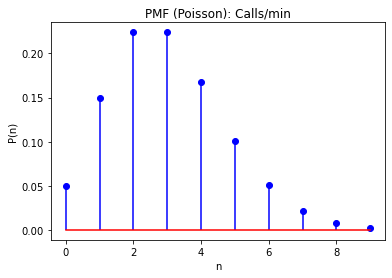

In [60]:
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('n')
plt.ylabel('P(n)')
plt.title('PMF (Poisson): Calls/min')
plt.show()

Sometime parameter determined from laws of physics, domain knowledge, etc.:

- Mean nuclear decay rate of Iodine-131 is 31.5 decay events/year.
- Decay events independent.

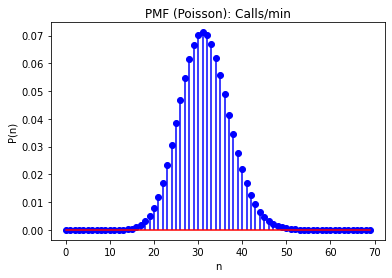

In [16]:
nuclear_pmf =[(x, poisson.pmf(x, 31.5)) for x in range(70)]
x,y = list(zip(*nuclear_pmf))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('n')
plt.ylabel('P(n)')
plt.title('PMF (Poisson): Calls/min')
plt.show()


- **Uniform Distribution**
    - Occurs when all possible outcomes are equally likely.
    - e.g. rolling a six-sided far die

#### Common types of distributions: Continuous 

- **Continuous Uniform**
    - A continuous distribution that takes values within a specified range *a* to *b*, when each value within the range is equally likely.
    - e.g. time take an elevator arrive at your floor.

- **Normal (Gaussian)**
    - The bell curve. Governs many continuous variables.
    - Particularly: variables made up of many random subfactors.
    - height in a population.
    - average number of ad clicks in 50 random samples of user-site interactions.

- **Exponential**
    - Uses to model the time elapsed between events.
    - e.g. amount of time a postal clerk spends with a customer

#### PDF: Probability Density Function
- Continuous limit of the histogram.

**Probability density functions (PDF)** similar to PMFs but:

- continuous variable
- probability of **exactly** having a given value of continuous not defined. 
- probability of a result within a range of values. 

![](images/pdf_temp.png)

- PDFs give us probability density.
- Area under PDF in given range yields probability.  

<center><img src="Images/pdf_proba.gif" width="450"/></center>

#### Sampling and the PDF with the normal distribution

Mathematical form for pdf:
$$ N(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

- $\mu$ is mean.
- $\sigma$ is standard deviation.

With scipy.stats:

- norm.pdf(loc = mean, scale = std)

In [17]:
from scipy.stats import norm

In [18]:
# Moving mean around
mu_list = [-2,0,2]
sigma = 1

x = np.linspace(-7,7)
y_list = [norm.pdf(x, loc = mu, scale = sigma)
          for mu in mu_list]

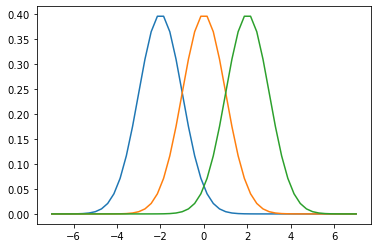

In [19]:
fig,ax = plt.subplots()
[ax.plot(x,y) for y in y_list]
plt.show()

In [20]:
# mess with std/variance
mu = 0
sigma_list = [1,2,4]

x = np.linspace(-8,8)
y_list = [norm.pdf(x, loc = mu, scale = sigma)
          for sigma in sigma_list]

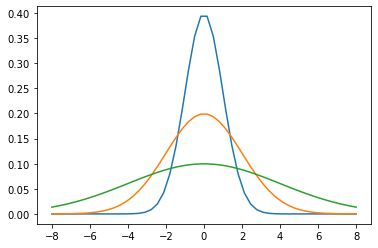

In [21]:
fig,ax = plt.subplots()
[ax.plot(x,y) for y in y_list]
plt.show()

The variance/std describes how closely the points gathered around the mean.  
- Low variance means tight and skinny, high variance short and wide.

#### Sampling from normal distribution

- rvs method:

In [22]:
# 20 random samples from normal with mean 0 and std 1.
norm_sample = norm.rvs(loc = 0, scale = 1, size = 100)
norm_sample

array([-0.32756802, -1.52079879,  0.89714124, -0.62170608, -0.7708182 ,
        0.30826629, -0.19437493,  0.77038719, -1.80901921,  1.29908767,
       -0.9253698 ,  0.18309461, -0.85273012, -0.49184428, -0.93282606,
       -0.48941273, -1.15317279,  0.96757202, -0.09364389,  0.34615282,
       -0.91753145, -1.14408592, -2.33440542, -1.3514136 , -0.98337254,
        0.71208831,  0.43331658,  0.59083487,  1.03343006,  0.92385897,
       -0.01931322, -0.4034433 , -0.28391769, -0.24506463, -0.8158534 ,
       -1.20546385,  0.03853212,  0.05530648,  0.87718227,  1.21413271,
        1.88116065,  1.86035748,  1.81220684, -0.15697779, -0.99564926,
        1.28242372, -2.37050943, -0.71028583, -0.16333272,  0.71333785,
        0.67444374, -1.65118505,  0.3713856 ,  0.76627251, -0.8139413 ,
        0.92746526,  0.69333132,  0.78137541,  0.62569657, -0.30684571,
        0.65468147,  0.53210416,  2.38500036, -0.06644241, -0.27114825,
        0.19770666, -0.40554607, -1.09572178, -1.64925934, -1.81

Looking at a histogram of sample:

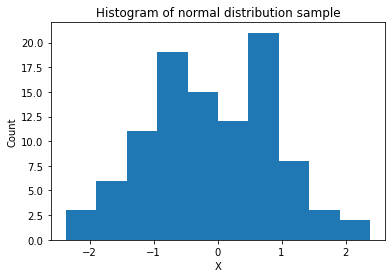

In [23]:
plt.hist(norm_sample)
plt.title('Histogram of normal distribution sample')
plt.xlabel('X')
plt.ylabel('Count')
plt.show()

#### CDF: Cumulative Distribution Function
Probability random variable <= a certain value. 


Mathematically, CDF is:

$$F(x) = P(X\leq x)$$

CDF exists for all probability distributions (discrete/continuous):

For continuous variable:
    
- while PDF at given X = x is a probability *density*
- CDF F(x) is actually a *probability*

Mathematically, CDF is:

$$F(x) = P(X\leq x)$$

Why use the CDF?
- Continuous variables:
- Actually reports probability
- Simple arithmetic operations to calculate probability of given range.

Implicitly used in most hypothesis tests:
- Calculate probability of a measured value or values more extreme
- CDF yields whether measured value is likely under a given distribution.

####  Discrete case:

Back to our ad click bait example: 

- Use CDF to calculate probability of having <= 2 clicks in 50 random samples.
- Recall $p = 0.04$ for a click.

$$P(x \leq 2)$$

#### CDF in scipy.stats

- scipy.stats.binom.cdf()

- Generally, scipy.stats.distribution.cdf(arguments)


In [24]:
# Create the random discrete value for the number of success
x = 2
n = 50
p = 0.04

# Calculate the probability for x equal or less than 8
binom.cdf(k = x, n=n, p=p)

0.6767140040965929

Visualize pmf and cdf side by side

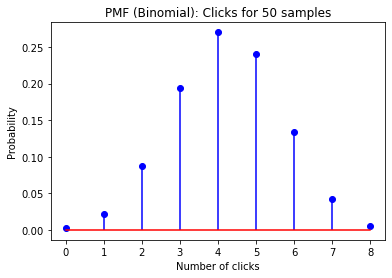

In [25]:
x,y = list(zip(*pmf_binomial))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of clicks')
plt.ylabel('Probability')
plt.title('PMF (Binomial): Clicks for 50 samples')
plt.show()

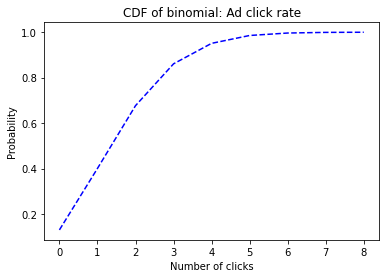

In [26]:
cdf_y = binom.cdf(k = x, n=n, p=p)
plt.plot(x, cdf_y, c = 'b', linestyle = '--')
plt.xlabel('Number of clicks')
plt.ylabel('Probability')
plt.title('CDF of binomial: Ad click rate')
plt.show()

- What is the probability of getting less than 8 clicks?

In [27]:
binom.cdf(8, n = n, p = p)

0.9998520965199652

- Probability of getting less than infinity?
(this is all possible values)

In [28]:
binom.cdf(np.inf, n = n, p = p)

1.0

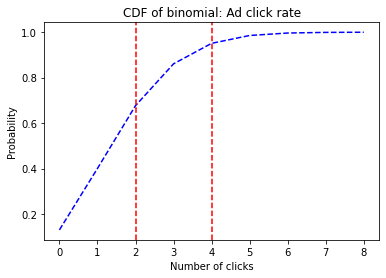

In [29]:
cdf_y = binom.cdf(k = x, n=n, p=p)
plt.plot(x, cdf_y, c = 'b', linestyle = '--')
plt.xlabel('Number of clicks')
plt.ylabel('Probability')
plt.title('CDF of binomial: Ad click rate')
plt.axvline(2, c = 'r', linestyle = '--')
plt.axvline(4, c = 'r', linestyle = '--')
plt.show()

What is probability of getting between 2 and 4?
- $ P(x <= 4) - P(x<=2)$

In [30]:
Pless4 = binom.cdf(k = 4, n=n, p=p)  
Pless2 = binom.cdf(k = 2, n=n, p=p)

Pless4 - Pless2

0.2743145240188942

What is the probability that we have greater than 4 clicks?
$$ P(x <= \infty) - P(x<=4)$$

$$ 1 - P(x<=4) $$

In python:

In [31]:
1 - binom.cdf(4, n, p)

0.048971471884512896

And if you are really that lazy:
- $P(X >x)$ as survival function: distribution.sf()

In [32]:
binom.sf(4, n , p)

0.04897147188451269

5\% chance of getting greater than 4 clicks in 50 randomized user-site interactions.

Generally:
$$ P(X > x) = 1 - P(X <= x) $$

<center>1 - distribution.cdf(x, parameters) </center>

#### Continuous Distribution
- CDF of the normal distribution

Example case: distribution of heights. 

We observe the mean is 5.5 ft with a standard deviation of 0.5 ft.

Model with normal distribution.

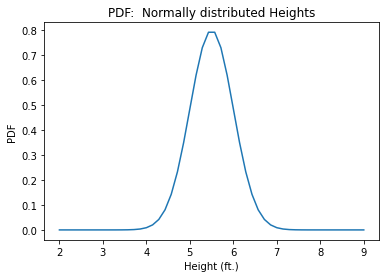

In [33]:
mu = 5.5 # mean
sigma = 0.5 # standard deviation

x = np.linspace(2,9)
y_norm = norm.pdf(x, loc = mu, scale = sigma)
plt.plot(x, y_norm)
plt.xlabel('Height (ft.)')
plt.ylabel('PDF')
plt.title('PDF:  Normally distributed Heights')
plt.show()


Probability that height <= 4.7:

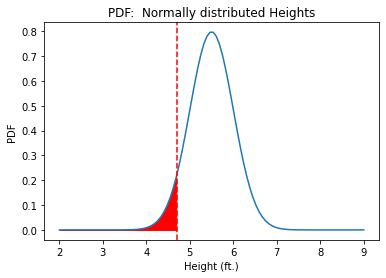

In [34]:
mu = 5.5 # mean
sigma = 0.5 # standard deviation

x = np.linspace(2,9, num = 100)
y_norm = norm.pdf(x, loc = mu, scale = sigma)
plt.plot(x, y_norm)
plt.fill_between(x,y_norm, where = (x <= 4.7), color='r')
plt.axvline(x = 4.7, c = 'r', linestyle = '--')
plt.xlabel('Height (ft.)')
plt.ylabel('PDF')
plt.title('PDF:  Normally distributed Heights')
plt.show()

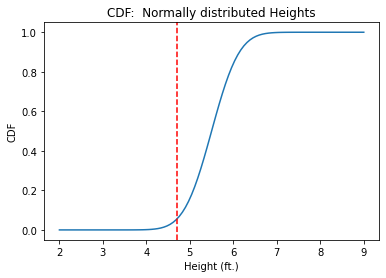

In [35]:
mu = 5.5 # mean
sigma = 0.5 # standard deviation

x = np.linspace(2,9, num = 100)
y_norm_cdf = norm.cdf(x, loc = mu, scale = sigma)
plt.plot(x, y_norm_cdf)
plt.axvline(x = 4.7, c = 'r', linestyle = '--')
plt.xlabel('Height (ft.)')
plt.ylabel('CDF')
plt.title('CDF:  Normally distributed Heights')
plt.show()

In [36]:
norm.cdf(4.7, loc = mu, scale = 0.5 )

0.05479929169955804

Probability that height is less than 4.5 ft and greater than 6.5 ft?
- Help me out. Use cdf and sf.

In [37]:
# mu is defined as mean already, set scale to 0.5 (std)

norm.cdf(4.5, loc = mu, scale =0.5) + norm.sf(6.5, loc = mu, scale =0.5)

0.04550026389635839